## Landscape of PFAS using ToxPrints and ToxPrint categories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

### Profiling inventory based on the 34 TxP Categories

In [3]:
def txp_categories(text_file):
    df = pd.read_csv(text_file, sep = ';')
    df.rename(columns = {'M_NAME': 'DTXSID'},inplace = True)
    df = df.set_index('DTXSID')
    df.drop(['M_COMPOUND_HISTORY_[STRING]','M_CORINA_SYMPHONY_ERRORS_[STRING]'],axis = 1, inplace = True)
    test_rev = []
    for i, row in df.iterrows():
        if (row['bond:C=O_carbonyl_generic'] == 1 ) & (row['bond:CC(=O)C_ketone_aliphatic_generic'] == 1):
            test_rev.append([i,'TxP_PFAS_ketone'])
        if (row['bond:C(=O)O_carboxylicEster_alkenyl'] == 1) & (row['bond:C(=O)O_carboxylicEster_acyclic'] == 1) &  (row['chain:alkeneLinear_mono-ene_ethylene_generic'] ==1) & (row['bond:C=O_carbonyl_generic'] ==1 ):
            test_rev.append([i,'TxP_PFAS_acrylate'])
        if (row['bond:COH_alcohol_aliphatic_generic'] == 1) & (row['bond:COH_alcohol_generic'] ==1):
            test_rev.append([i, 'TxP_PFAS_alcohol'])
        if (row['bond:COH_alcohol_aliphatic_generic'] == 1) & (row['bond:COH_alcohol_generic'] ==1) & (row['bond:COH_alcohol_pri-alkyl'] == 1):
            test_rev.append([i,'TxP_PFAS_alcohol_primary']) 
        if (row['bond:COH_alcohol_aliphatic_generic'] == 1) & (row['bond:COH_alcohol_generic'] ==1) & (row['bond:COH_alcohol_pri-alkyl'] == 1) & (row['bond:COH_alcohol_sec-alkyl'] ==1):
            test_rev.append([i,'TxP_PFAS_alcohol_primary_FT_diol']) 
        if (row['bond:COH_alcohol_aliphatic_generic'] == 1) & (row['bond:COH_alcohol_generic'] ==1) & (row['bond:COH_alcohol_pri-alkyl'] == 1) & (row['bond:C(~Z)~C~Q_a-haloalcohol'] ==1):
            test_rev.append([i,'TxP_PFAS_alcohol_primary_FTn1']) 
        if (row['bond:COH_alcohol_aliphatic_generic'] == 1) & (row['bond:COH_alcohol_generic'] ==1) & (row['bond:COH_alcohol_pri-alkyl'] == 1) & (row['chain:alkaneLinear_propyl_C3'] ==1) & (row['chain:alkaneLinear_ethyl_C2(H_gt_1)'] == 1):
            test_rev.append([i,'TxP_PFAS_alcohol_primary_FTn2'])
        if (row['bond:COH_alcohol_aliphatic_generic'] == 1) & (row['bond:COH_alcohol_generic'] ==1) & (row['bond:C(~Z)~C~Q_a-haloalcohol'] == 1) & (row['bond:COH_alcohol_pri-alkyl'] == 0):
            test_rev.append([i,'TxP_PFAS_alcohol_polyF']) 
        if (row['bond:COH_alcohol_aliphatic_generic'] == 1) & (row['bond:COH_alcohol_generic'] ==1) & (row['bond:S(=O)N_sulfonylamide'] ==1):
            test_rev.append([i,'TxP_PFAS_alcohol_sulfonylamide']) 
        if (row['bond:CN_amine_aliphatic_generic'] ==1):
            test_rev.append([i,'TxP_PFAS_amine']) 
        if (row['bond:CN_amine_aliphatic_generic'] ==1) & (row['bond:COC_ether_aliphatic'] ==1):
            test_rev.append([i,'TxP_PFAS_amine_ether']) 
        if (row['bond:CN_amine_aliphatic_generic'] ==1) & (row['bond:CN_amine_pri-NH2_alkyl'] ==1):
            test_rev.append([i,'TxP_PFAS_amine_primary']) 
        if (row['bond:C(=O)O_carboxylicAcid_generic'] ==1):
            test_rev.append([i,'TxP_PFAS_COOH']) 
        if (row['bond:C(=O)O_carboxylicAcid_generic'] ==1) & (row['bond:COC_ether_aliphatic'] ==1):
            test_rev.append([i,'TxP_PFAS_COOH_ether']) 
        if (row['bond:C(=O)O_carboxylicAcid_generic'] ==1) & (row['chain:alkeneLinear_mono-ene_ethylene_generic'] ==1):
            test_rev.append([i,'TxP_PFAS_COOH_ethylene']) 
        if (row['bond:C(=O)O_carboxylicAcid_generic'] ==1) & (row['bond:C(=O)O_carboxylicAcid_alkyl'] ==1) & (row['chain:alkaneLinear_ethyl_C2(H_gt_1)'] ==1) & (row['chain:alkaneLinear_propyl_C3'] ==1) & (row['chain:alkaneLinear_ethyl_C2_(connect_noZ_CN=4)'] ==1):
            test_rev.append([i,'TxP_PFAS_COOH_FT'])
        if (row['bond:C(=O)O_carboxylicEster_acyclic'] ==1) & (row['bond:C(=O)O_carboxylicEster_alkyl'] ==1) & (row['bond:C=O_carbonyl_generic'] ==1):
            test_rev.append([i,'TxP_PFAS_COOR']) 

        if (row['bond:S=O_sulfonyl_generic'] ==1):
            test_rev.append([i,'TxP_PFAS_sulfonyl']) 
        if (row['bond:S=O_sulfonyl_generic'] ==1) & (row['bond:S(=O)N_sulfonylamide'] == 1):   
            test_rev.append([i,'TxP_PFAS_sulfonamide'])
        if (row['bond:S=O_sulfonyl_generic'] == 1) & (row['bond:S(=O)N_sulfonylamide'] == 1) & (row['bond:COH_alcohol_generic'] ==1):
            test_rev.append([i,'TxP_PFAS_sulfonamide_alcohol'])
        if (row['bond:S(=O)O_sulfonicAcid_generic'] == 1) & (row['bond:S(=O)O_sulfonate'] == 1) & (row['bond:S(=O)O_sulfonicAcid_acyclic_(chain)'] == 1):
            test_rev.append([i,'TxP_PFAS_sulfonate']) 
        if (row['bond:S(=O)O_sulfonicAcid_generic'] == 1) & (row['bond:S(=O)O_sulfonate'] == 1) & (row['bond:S(=O)O_sulfonicAcid_acyclic_(chain)'] == 1) & (row['chain:alkaneLinear_ethyl_C2(H_gt_1)'] == 1) & (row['chain:alkaneLinear_propyl_C3'] == 1):   
            test_rev.append([i,'TxP_PFAS_sulfonate_FTn2'])
        if (row['bond:S=O_sulfonyl_generic'] ==1) & (row['bond:S(=O)X_sulfonylhalide'] ==1):
            test_rev.append([i,'TxP_PFAS_sulfonylhalide']) 
        if (row['bond:COC_ether_aliphatic'] ==1):
            test_rev.append([i,'TxP_PFAS_ether']) 
        if (row['bond:metal_metalloid_Si_organo'] ==1):
            test_rev.append([i,'TxP_PFAS_silane'])
        if (row['bond:C(=O)N_carboxamide_generic'] ==1):
            test_rev.append([i,'TxP_PFAS_carboxamide'])
        if (row['bond:C=O_acyl_halide'] ==1):
            test_rev.append([i,'TxP_PFAS_acylhalide'])
        if (row['bond:OZ_oxide_hyroxy'] ==1):
            test_rev.append([i,'TxP_PFAS_oxidehydroxy'])
        if (row['bond:CX_halide_alkyl-F_perfluoro_hexyl'] == 1) & (row['bond:CX_halide_alkyl-F_perfluoro_octyl'] == 0):
            test_rev.append([i,'TxP_PFAS_perFhexyl'])
        if (row['bond:CX_halide_alkyl-F_perfluoro_octyl'] == 1):
            test_rev.append([i,'TxP_PFAS_perFoctyl']) 
        if (row['bond:CX_halide_alkyl-X_primary'] == 1):
            test_rev.append([i,'TxP_PFAS_alkylXprimary'])
        if (row['bond:CX_halide_alkyl-X_tertiary'] == 1) & (row['bond:C=O_carbonyl_generic'] == 0): 
            test_rev.append([i, 'TxP_PFAS_alkylXtertiaryxCO']) 
        if (row['chain:alkeneLinear_mono-ene_ethylene_generic'] == 1) & (row['bond:C=O_carbonyl_generic'] == 0): 
            test_rev.append([i, 'TxP_PFAS_ethylene_xCO'])
        if (row['bond:C=O_carbonyl_generic'] == 1) & (row['bond:C(=O)N_carboxamide_generic'] == 0) & (row['bond:C(=O)O_carboxylicAcid_generic'] == 0) & (row['bond:C(=O)O_carboxylicEster_alkenyl'] == 0) & (row['bond:C(=O)O_carboxylicEster_alkyl'] == 0) & (row['bond:C=O_acyl_halide'] == 0) & (row['bond:CC(=O)C_ketone_aliphatic_generic'] == 0): 
            test_rev.append([i,'TxP_PFAS_aldehydeanhydride'])
    return pd.DataFrame(test_rev, columns = ['DTXSID', 'Txp_cats'])       

In [4]:
struct10776_cats = txp_categories(interim_dir+'pfasstructv4_4TxPs_res.txt')

In [5]:
struct10776_cats.head()

,DTXSID,Txp_cats
0,DTXSID90804377,TxP_PFAS_alkylXtertiaryxCO
1,DTXSID80407235,TxP_PFAS_ketone
2,DTXSID80407235,TxP_PFAS_perFhexyl
3,DTXSID90785778,TxP_PFAS_perFoctyl
4,DTXSID301035635,TxP_PFAS_alcohol


In [8]:
struct10776_cats.to_csv(processed_dir+'struct10776_TxP_assignments.csv')

In [6]:
ivt_cats = txp_categories(raw_dir+'results_182.txt')

In [7]:
oecd_cats = txp_categories(raw_dir+'results_OECD.txt')
inv_cats = txp_categories(raw_dir+'results_430.txt')


In [8]:
tsca_cats = txp_categories(interim_dir+'OPSCPP_4TxPs_res.txt')

In [9]:
''''ivt_cats.to_csv(processed_dat_dir+'ivt_TxP_assignments.csv')
oecd_cats.to_csv(processed_dat_dir+'oecd_TxP_assignments.csv')
inv_cats.to_csv(processed_dat_dir+'inv_TxP_assignments.csv')
struct_cats.to_csv(processed_dat_dir+'struct_TxP_assignments.csv')
tsca_cats.to_csv(processed_dat_dir+'tsca_TxP_assignments.csv')

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-9-5e562b7fe99f>, line 5)

In [10]:
def txp_fps(text_file):
    df = pd.read_csv(text_file, sep = ';')
    df.rename(columns = {'M_NAME': 'DTXSID'},inplace = True)
    df.drop(['M_COMPOUND_HISTORY_[STRING]','M_CORINA_SYMPHONY_ERRORS_[STRING]'],axis = 1, inplace = True)
    return df
  

In [11]:
oecd_txps = txp_fps(raw_dir+'results_OECD.txt')
inv_txps = txp_fps(raw_dir+'results_430.txt')
struct_txps = txp_fps(interim_dir+'pfasstructv4_4TxPs_res.txt')
tsca_txps = txp_fps(interim_dir+'OPSCPP_4TxPs_res.txt')
ivt_txps = txp_fps(raw_dir+'results_182.txt')

### Countplot of Inventories wrt 34 Structural categories

In [12]:
a = tsca_cats.groupby('Txp_cats').count().reset_index()
b = struct10776_cats.groupby('Txp_cats').count().reset_index()
c = oecd_cats.groupby('Txp_cats').count().reset_index()
d = inv_cats.groupby('Txp_cats').count().reset_index()
e = ivt_cats.groupby('Txp_cats').count().reset_index()

In [13]:
a.rename(columns = {'DTXSID': 'PFASEPA_Count'}, inplace = True)
b.rename(columns = {'DTXSID': 'PFASSTRUCT_Count'}, inplace = True)
c.rename(columns = {'DTXSID': 'PFASOECD_Count'}, inplace = True)
d.rename(columns = {'DTXSID': 'PFASINV_Count'}, inplace = True)
e.rename(columns = {'DTXSID': 'PFASIVT_Count'}, inplace = True)

In [14]:
ab = pd.merge(a,b, on = 'Txp_cats', how = 'outer')

In [15]:
abc = pd.merge(ab, c, on = 'Txp_cats', how = 'outer')

In [16]:
abcd = pd.merge(abc, d, on = 'Txp_cats', how = 'outer')

In [17]:
abcde = pd.merge(abcd, e, on = 'Txp_cats', how = 'outer')

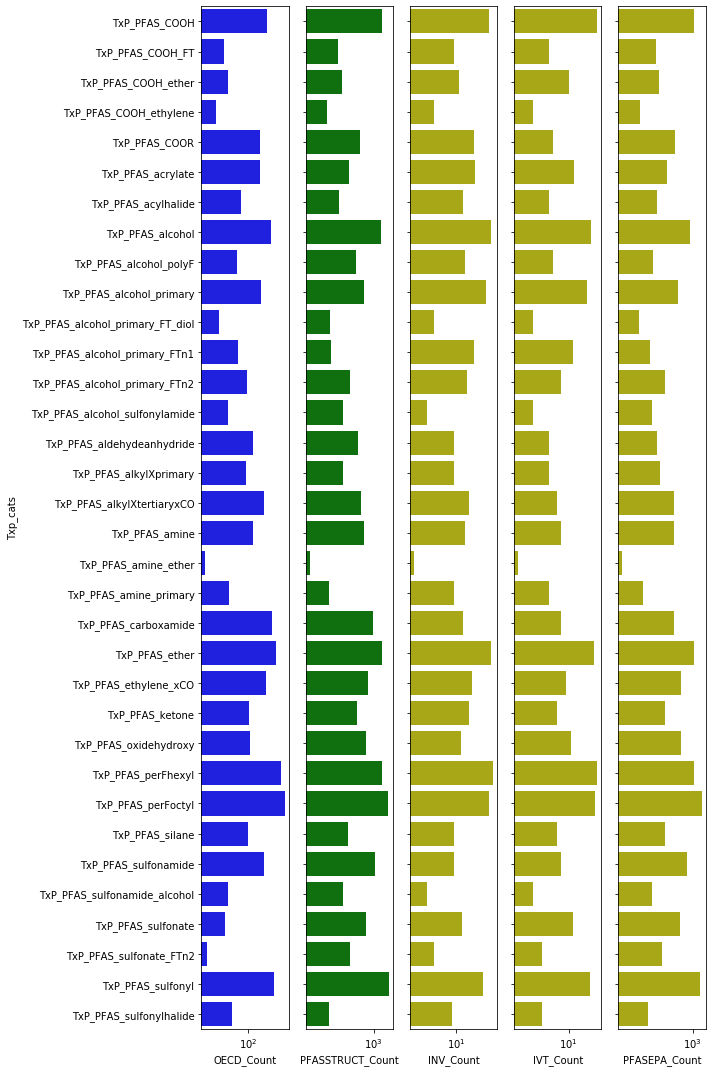

In [18]:
f,(ax1,ax2,ax3, ax4, ax5) = plt.subplots(1,5, figsize=(10,15), sharey = True)


sns.barplot(x = 'PFASOECD_Count', y = 'Txp_cats', color = 'b',label = 'OECD_Count', data = abcde, ax=ax1)
sns.barplot(x = 'PFASSTRUCT_Count', y = 'Txp_cats', color = 'g',label = 'STRUCT_Count', data = abcde, ax = ax2)
sns.barplot(x = 'PFASINV_Count', y = 'Txp_cats', color = 'y',label = 'INV_Count', data = abcde, ax= ax3)
sns.barplot(x = 'PFASIVT_Count', y = 'Txp_cats', color = 'y',label = 'IVT_Count', data = abcde, ax= ax4)
sns.barplot(x = 'PFASEPA_Count', y = 'Txp_cats', color = 'y',label = 'PFASEPA_Count', data = abcde, ax= ax5)

ax1.set_ylabel('Txp_cats')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')


ax1.set_xlabel('OECD_Count')
ax2.set_xlabel('PFASSTRUCT_Count')
ax3.set_xlabel('INV_Count')
ax4.set_xlabel('IVT_Count')
ax5.set_xlabel('PFASEPA_Count')

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')
ax5.set_xscale('log')

plt.tight_layout()
plt.savefig(figures_dir+'countplot_TxP_cats_per_inventory_080921.png', dpi = 300)

### Countplot re-drawn to take into account substances not assigned into a Category

In [19]:
tsca_all = pd.merge(tsca_txps, tsca_cats,on = 'DTXSID', how = 'left')
inv_all = pd.merge(inv_txps, inv_cats,on = 'DTXSID', how = 'left')
ivt_all = pd.merge(ivt_txps, ivt_cats,on = 'DTXSID', how = 'left')
oecd_all = pd.merge(oecd_txps, oecd_cats,on = 'DTXSID', how = 'left')
struct_all = pd.merge(struct_txps, struct10776_cats,on = 'DTXSID', how = 'left')

In [20]:
aa = tsca_all.Txp_cats.value_counts(dropna = False, normalize = True).reset_index()
bb = struct_all.Txp_cats.value_counts(dropna = False, normalize = True).reset_index()
cc = oecd_all.Txp_cats.value_counts(dropna = False, normalize = True).reset_index()
dd = inv_all.Txp_cats.value_counts(dropna = False, normalize = True).reset_index()
ee = ivt_all.Txp_cats.value_counts(dropna = False, normalize = True).reset_index()

In [21]:
aa.rename(columns = {'Txp_cats': 'PFASEPA_Count', 'index': 'Txp_cats'}, inplace = True)
bb.rename(columns = {'Txp_cats': 'PFASSTRUCT_Count', 'index': 'Txp_cats'}, inplace = True)
cc.rename(columns = {'Txp_cats': 'PFASOECD_Count', 'index': 'Txp_cats' }, inplace = True)
dd.rename(columns = {'Txp_cats': 'PFASINV_Count','index': 'Txp_cats' }, inplace = True)
ee.rename(columns = {'Txp_cats': 'PFASIVT_Count', 'index': 'Txp_cats'}, inplace = True)

In [22]:
x = pd.merge(aa, bb,on = 'Txp_cats', how = 'outer')
y = pd.merge(x, cc, on = 'Txp_cats', how = 'outer')
z = pd.merge(y, dd, on = 'Txp_cats', how = 'outer')
w = pd.merge(z, ee, on = 'Txp_cats', how = 'outer')

In [23]:
w['Txp_cats'] = w.Txp_cats.replace(np.nan, 'No_TxP_Cat')

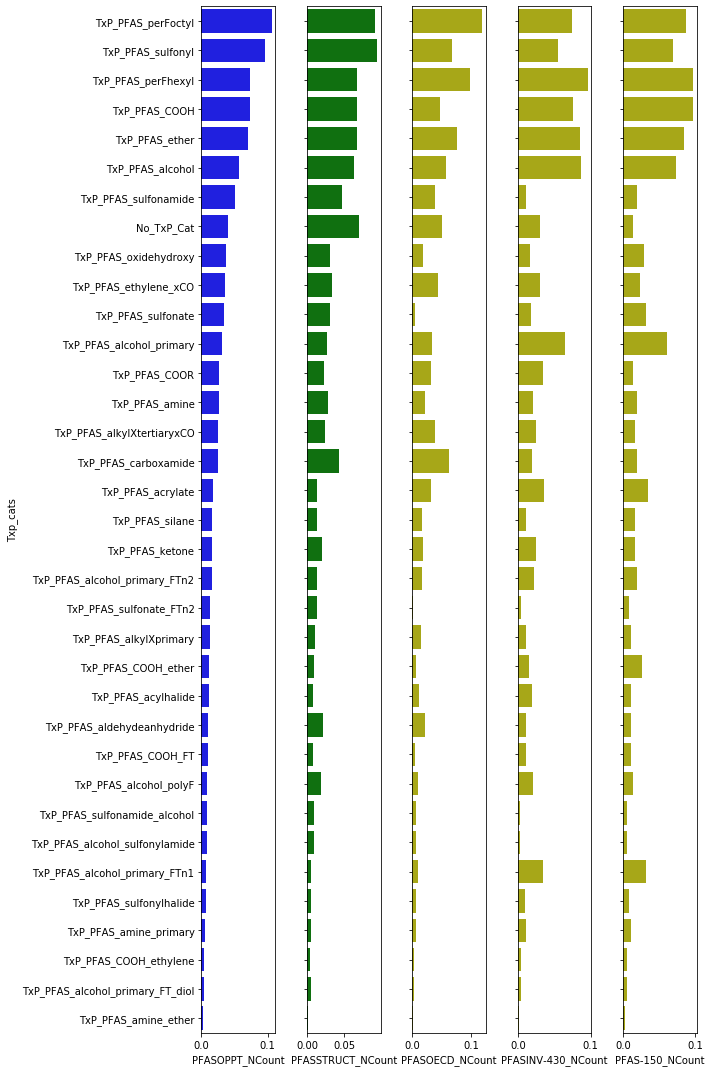

In [26]:
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(10,15), sharey = True)


sns.barplot(x = 'PFASEPA_Count', y = 'Txp_cats', color = 'b',label = 'PFASEPA_Norm_Count', data = w, ax=ax1)
sns.barplot(x = 'PFASSTRUCT_Count', y = 'Txp_cats', color = 'g',label = 'PFASSTRUCT_Norm_Count', data = w, ax = ax2)
sns.barplot(x = 'PFASOECD_Count', y = 'Txp_cats', color = 'y',label = 'PFASOECD_Norm_Count', data = w, ax= ax3)
sns.barplot(x = 'PFASINV_Count', y = 'Txp_cats', color = 'y',label = 'PFASINV-430_Norm Count', data = w, ax= ax4)
sns.barplot(x = 'PFASIVT_Count', y = 'Txp_cats', color = 'y',label = 'PFAS-150_Norm_Count', data = w, ax= ax5)



ax1.set_ylabel('Txp_cats')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')

ax1.set_xlabel('PFASOPPT_NCount')
ax2.set_xlabel('PFASSTRUCT_NCount')
ax3.set_xlabel('PFASOECD_NCount')
ax4.set_xlabel('PFASINV-430_NCount')
ax5.set_xlabel('PFAS-150_NCount')

plt.tight_layout()

plt.savefig(figures_dir+'Category_landscapes_230921.png', dpi = 300)

### Proportion of substances across inventories not assigned into one of the 34 structural categories

In [27]:
w[w['Txp_cats'] == 'No_TxP_Cat']

,Txp_cats,PFASEPA_Count,PFASSTRUCT_Count,PFASOECD_Count,PFASINV_Count,PFASIVT_Count
7,No_TxP_Cat,0.040526,0.069682,0.050542,0.03038,0.013193


### Tagging datasets to prep for TSNE

In [28]:
tsca_all['Tag'] = 'PFASOPPT'

In [29]:

inv_all['Tag'] = 'PFASINV-430'
ivt_all['Tag'] = 'PFAS-150'
oecd_all['Tag'] = 'PFASOECD' 
struct_all['Tag'] = 'PFASSTRUCT'

In [30]:
struct_all = struct_all.set_index('DTXSID')
inv_all = inv_all.set_index('DTXSID')
ivt_all = ivt_all.set_index('DTXSID')
tsca_all = tsca_all.set_index('DTXSID')


In [166]:
''''struct_all.to_csv(processed_dat_dir+'PFASstruct_all.csv')
inv_all.to_csv(processed_dat_dir+'PFASINV_all.csv')
ivt_all.to_csv(processed_dat_dir+'PFASIVT_all.csv')
tsca_all.to_csv(processed_dat_dir+'PFASTSCA_all.csv')
oecd_all.to_csv(processed_dat_dir+'PFASOECD_all.csv')

In [31]:
all_PFAS_tagged = pd.concat([struct_all,inv_all,ivt_all,tsca_all ], axis = 0)

In [32]:
all_PFAS_tagged.head()

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,Txp_cats,Tag
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID90804377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_alkylXtertiaryxCO,PFASSTRUCT
DTXSID80407235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_ketone,PFASSTRUCT
DTXSID80407235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_perFhexyl,PFASSTRUCT
DTXSID90785778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_perFoctyl,PFASSTRUCT
DTXSID301035635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_alcohol,PFASSTRUCT


In [33]:
all_PFAS_tagged.Tag.unique()

array(['PFASSTRUCT', 'PFASINV-430', 'PFAS-150', 'PFASOPPT'], dtype=object)

In [34]:
all_PFAS_tagged.shape

(38561, 731)

### TNSE projection

In [35]:
from sklearn.manifold import TSNE

In [36]:
model = TSNE(learning_rate = 200)

In [37]:
all_PFAS_tagged.columns.get_loc('Txp_cats')

729

In [38]:
#all_PFAS_tagged.iloc[:,:729]

In [39]:
samples = all_PFAS_tagged.iloc[:,:729].values

In [40]:
tsne_features = model.fit_transform(samples)

In [41]:
#cat_tags = all_PFAS_tagged[all_PFAS_tagged['ring:polycycle_tricyclo_benzvalene'] != '-']['Txp_cats'].tolist()

In [42]:
tsne_df = pd.DataFrame(tsne_features)
tsne_df.columns = ['X', 'Y']

In [43]:
tsne_df.head()

,X,Y
0,10.791040,-4.065423
1,-15.217853,-17.156660
2,-15.217980,-17.155544
3,21.958029,-4.171873
4,-16.215942,79.593933


In [44]:
tsne_df.shape

(38561, 2)

In [45]:
all_PFAS_tagged

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,Txp_cats,Tag
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID90804377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_alkylXtertiaryxCO,PFASSTRUCT
DTXSID80407235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_ketone,PFASSTRUCT
DTXSID80407235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_perFhexyl,PFASSTRUCT
DTXSID90785778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_perFoctyl,PFASSTRUCT
DTXSID301035635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TxP_PFAS_alcohol,PFASSTRUCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID60763548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,PFASOPPT
DTXSID70373899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,PFASOPPT
DTXSID801020403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,PFASOPPT


In [46]:
cat_tags = all_PFAS_tagged.iloc[:,729].reset_index()

In [47]:
tsne_cat_df = pd.concat([tsne_df, cat_tags], axis =1)

In [48]:
tsne_cat_df['Txp_cats'] = tsne_cat_df['Txp_cats'].replace(np.nan, 'no_Txp_cat')

In [49]:
tsne_cat_df

,X,Y,DTXSID,Txp_cats
0,10.791040,-4.065423,DTXSID90804377,TxP_PFAS_alkylXtertiaryxCO
1,-15.217853,-17.156660,DTXSID80407235,TxP_PFAS_ketone
2,-15.217980,-17.155544,DTXSID80407235,TxP_PFAS_perFhexyl
3,21.958029,-4.171873,DTXSID90785778,TxP_PFAS_perFoctyl
4,-16.215942,79.593933,DTXSID301035635,TxP_PFAS_alcohol
...,...,...,...,...
38556,-0.734720,-3.633416,DTXSID60763548,no_Txp_cat
38557,-2.113240,-4.491158,DTXSID70373899,no_Txp_cat
38558,0.274890,-5.720921,DTXSID801020403,no_Txp_cat
38559,11.822445,-8.178339,DTXSID801023138,no_Txp_cat


In [50]:
tsne_cat_df.head()

,X,Y,DTXSID,Txp_cats
0,10.791040,-4.065423,DTXSID90804377,TxP_PFAS_alkylXtertiaryxCO
1,-15.217853,-17.156660,DTXSID80407235,TxP_PFAS_ketone
2,-15.217980,-17.155544,DTXSID80407235,TxP_PFAS_perFhexyl
3,21.958029,-4.171873,DTXSID90785778,TxP_PFAS_perFoctyl
4,-16.215942,79.593933,DTXSID301035635,TxP_PFAS_alcohol


In [51]:
#tsne_cat_df['Txp_cats'].value_counts(dropna = False)

In [53]:
color_dict = dict({'PFASSTRUCT':'green',
                  'PFASOPPT':'blue',
                  'PFASINV-430': 'orange',
                   'PFAS-150': 'red'})

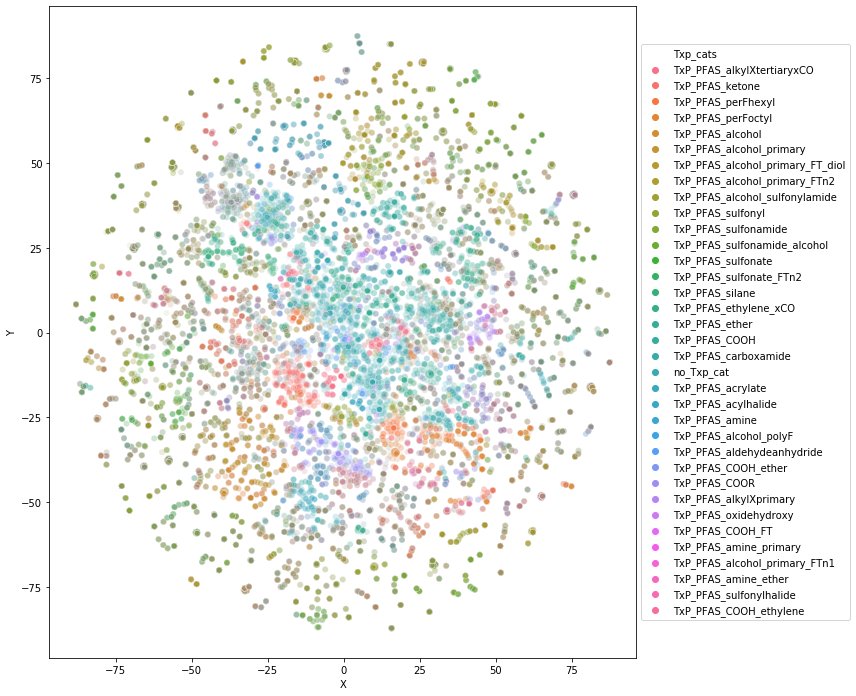

In [54]:
plt.figure(figsize = (12,10))

ax = sns.scatterplot(x = 'X', y = 'Y' , hue = 'Txp_cats', alpha = 0.1, data = tsne_cat_df)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(figures_dir+'TSNE_landscapes_cats_080921.png', dpi = 300)

In [55]:
all_PFAS_tagged2 = all_PFAS_tagged.drop(['Txp_cats'], axis = 1)

In [56]:
all_PFAS_tagged2 = all_PFAS_tagged2.drop_duplicates()

In [57]:
samples2 = all_PFAS_tagged2.iloc[:,:-1].values

In [58]:
tsne_features2 = model.fit_transform(samples2)

In [59]:
tsne_df2 = pd.DataFrame(tsne_features2)
tsne_df2.columns = ['X', 'Y']

In [60]:
tsne_df2

,X,Y
0,12.503394,-4.184792
1,31.817316,36.686554
2,44.657898,-53.964355
3,-76.553978,-43.672222
4,70.595795,-47.707645
...,...,...
11029,26.981453,-24.261784
11030,1.527115,-36.156498
11031,15.642085,-27.710665
11032,33.753185,-32.066277


In [61]:
tags = all_PFAS_tagged2.iloc[:,-1].reset_index()
tsne_df2 = pd.concat([tsne_df2, tags], axis =1)

In [62]:
tsne_df2

,X,Y,DTXSID,Tag
0,12.503394,-4.184792,DTXSID90804377,PFASSTRUCT
1,31.817316,36.686554,DTXSID80407235,PFASSTRUCT
2,44.657898,-53.964355,DTXSID90785778,PFASSTRUCT
3,-76.553978,-43.672222,DTXSID301035635,PFASSTRUCT
4,70.595795,-47.707645,DTXSID801026849,PFASSTRUCT
...,...,...,...,...
11029,26.981453,-24.261784,DTXSID00718315,PFASOPPT
11030,1.527115,-36.156498,DTXSID00855532,PFASOPPT
11031,15.642085,-27.710665,DTXSID10789379,PFASOPPT
11032,33.753185,-32.066277,DTXSID50423109,PFASOPPT


In [63]:
tsne_df2.Tag.unique()

array(['PFASSTRUCT', 'PFASINV-430', 'PFAS-150', 'PFASOPPT'], dtype=object)

In [64]:
tsne_df2['alpha'] = tsne_df2['Tag'].apply(lambda x: 0.2 if x in ['PFASSTRUCT', 'PFASOPPT'] else 1)

In [65]:
tsne_df2.head()

,X,Y,DTXSID,Tag,alpha
0,12.503394,-4.184792,DTXSID90804377,PFASSTRUCT,0.2
1,31.817316,36.686554,DTXSID80407235,PFASSTRUCT,0.2
2,44.657898,-53.964355,DTXSID90785778,PFASSTRUCT,0.2
3,-76.553978,-43.672222,DTXSID301035635,PFASSTRUCT,0.2
4,70.595795,-47.707645,DTXSID801026849,PFASSTRUCT,0.2


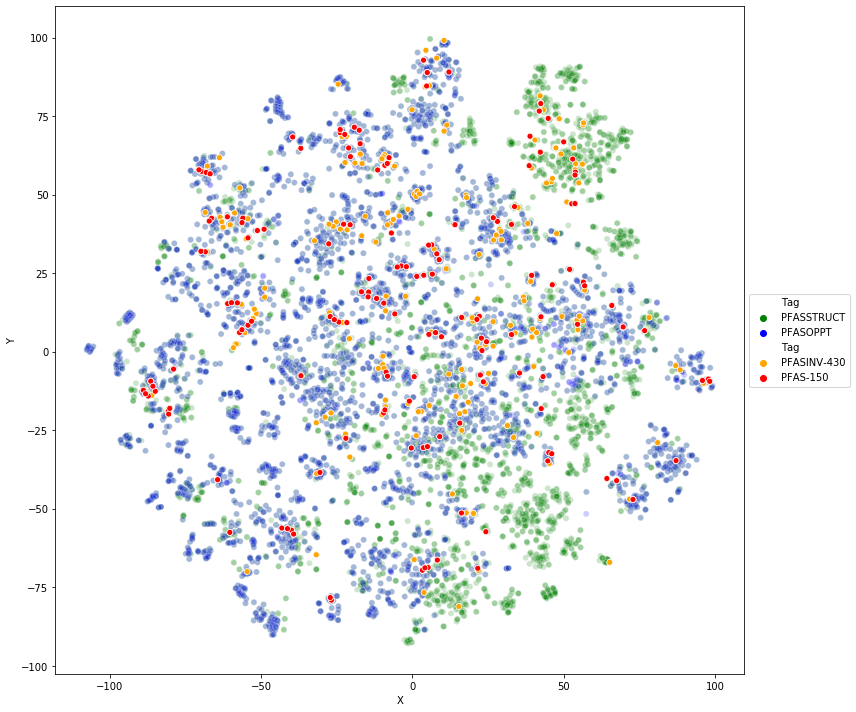

In [66]:
plt.figure(figsize = (12,10))
ax = sns.scatterplot(x="X", y="Y", hue = 'Tag',
                     data=tsne_df2[tsne_df2.alpha == 0.2], alpha=0.2, palette = color_dict)
sns.scatterplot(x="X", y="Y", hue = 'Tag', data=tsne_df2[tsne_df2.alpha == 1.0], 
                alpha=1.0, ax=ax, palette = color_dict)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(figures_dir+'TSNE_landscapes_tagged_230921.png', dpi = 300)